# Problem statement

- We need to predict whether a person has a salary above 50k or less than 50k
- This is a <b>Classification</b> problem
- URL of the dataset https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np  # I may not be using it

# For EDA and cleaning the data
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For building a model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder

/home/afzaal/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Loading the data

In [2]:
income_df = pd.read_csv('adult.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                           'marital-status', 'occupation', 'relationship', 'race',
                                           'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                                           'native-country', 'salary'])

### Miscellaneous

In [3]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income_df.shape

(32561, 15)

There are <b>32561</b> rows and <b>15</b> columns in the data

In [5]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are <b>no null</b> values in the dataset<br>
There are <b>six numerical</b> columns<br>
There are <b>nine text</b> columns

In [6]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Some statistics about the numerical columns in the data

## EDA

In [7]:
income_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [8]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


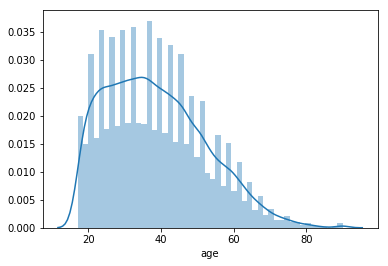

In [9]:
sns.distplot(income_df.age)

<b>Age column is normally distributed</b>

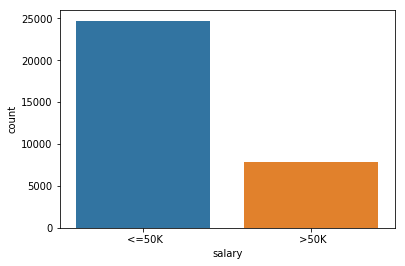

In [10]:
sns.countplot(income_df.salary)

<b>There are about 24000 people who have a salary less than 50k and remaining have above 50k</b>

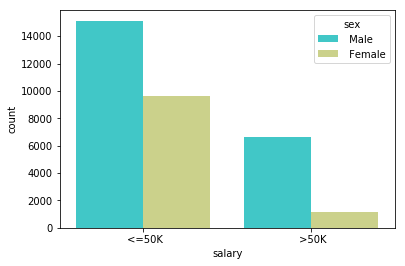

In [11]:
sns.countplot(income_df.salary, hue=income_df.sex, palette='rainbow')

<b>Males have more salary than females</b>

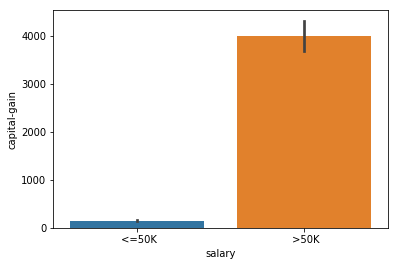

In [12]:
sns.barplot(income_df.salary, income_df['capital-gain'])

<b>People who have a salary above 50k have higher capital-gain</b>

In [13]:
income_df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

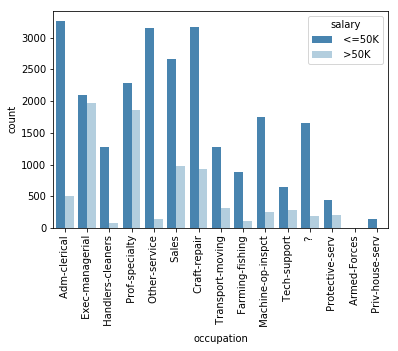

In [14]:
plt.xticks(rotation=90)
sns.countplot(income_df.occupation, hue=income_df.salary, palette='Blues_r')

<b>Exec-managerical have highest salary above 50k</b>

In [15]:
income_df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

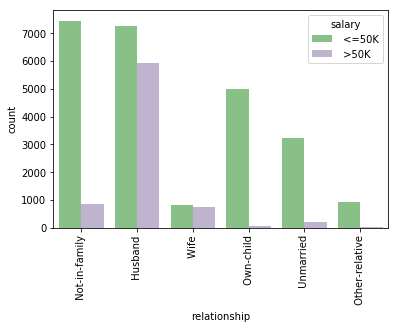

In [16]:
plt.xticks(rotation=90)

sns.countplot(income_df.relationship, hue=income_df.salary, palette='Accent')

<b>Husbands are earning more than 50k</b><br>
<b>Not-in Family relationship people are earning less than 50k</b>

In [17]:
income_df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

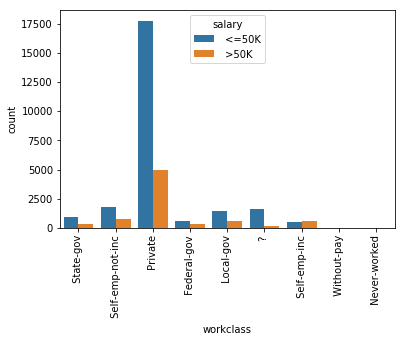

In [18]:
plt.xticks(rotation=90)
sns.countplot(income_df.workclass, hue=income_df.salary)

<b>Private employees are earning more than any other type of employee</b>

In [19]:
income_df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

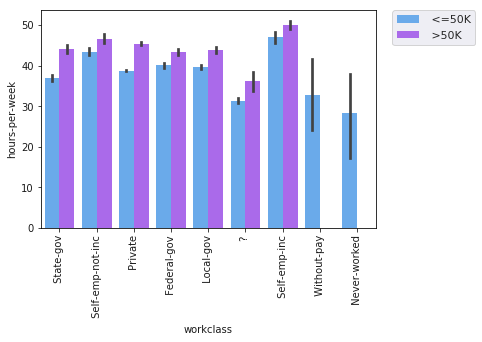

In [20]:
plt.xticks(rotation=90)
sns.barplot(income_df.workclass, income_df['hours-per-week'], hue=income_df.salary, palette='cool')
sns.set()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

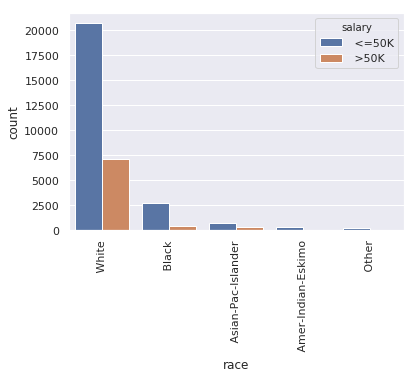

In [21]:
plt.xticks(rotation=90)
sns.countplot(income_df.race, hue=income_df.salary)

<b>White people are earning more</b>

In [22]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Removing unnecessary columns

Removing below columns from data
- fnlwgt
- education-num

In [23]:
income_df.drop(['fnlwgt', 'education-num'], axis=1, inplace=True)

In [24]:
income_df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Converting categorical columns to numerical columns

Categorical columns
- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex
- native-country<br>

We'll use one-hot encoding to convert categorical columns to numerical columns.

In [25]:
dummies = pd.get_dummies(income_df.drop(['salary', 'age', 'capital-gain', 'capital-loss',
                                        'hours-per-week'], axis=1))

In [26]:
dummies.shape

(32561, 102)

In [27]:
dummies.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
merged = pd.concat([income_df, dummies], axis=1)

In [29]:
merged.shape

(32561, 115)

In [30]:
merged.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
merged.columns[:100]

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'salary', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spou

In [32]:
final_df = merged.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                       'race', 'sex', 'native-country'], axis=1)

In [33]:
final_df.head()

,age,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,2174,0,40,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
final_df.shape

(32561, 107)

### Converting target variable to numerical type

In [35]:
final_df.replace([' <=50K', ' >50K'], [0, 1], inplace=True)

## Splitting the data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('salary', axis=1), final_df.salary, 
                                                   test_size=0.30, random_state=4)

In [37]:
X_train.shape

(22792, 106)

In [38]:
X_test.shape

(9769, 106)

## Training the model

In [39]:
gbm = GradientBoostingClassifier()

In [40]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## Evaluation

In [41]:
predictions = gbm.predict(X_test)

In [42]:
predictions

array([0, 0, 1, ..., 1, 0, 1])

In [43]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7401
           1       0.79      0.59      0.67      2368

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.85      9769



In [44]:
metrics.accuracy_score(y_test, predictions)

0.8622172177295526

In [45]:
metrics.roc_auc_score(y_test, predictions)

0.7684915262090223

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lg = LogisticRegression()

In [51]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
predictions = lg.predict(X_test)

In [53]:
predictions

array([0, 0, 1, ..., 1, 0, 0])

In [54]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7401
           1       0.73      0.60      0.66      2368

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [55]:
metrics.accuracy_score(y_test, predictions)

0.8494216398812571